# 1. **Análisis Exploratorio de Datos (EDA)** - 20%

## Importación dataframe & librerias

In [927]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [928]:
df=X.copy()

In [929]:
df=pd.read_csv("german_credit_data.txt", 
    sep=r"\s+",        # separador por espacios (uno o más)
    header=None,       # no hay encabezados
    na_values="?"      # convierte '?' en NaN
)

In [930]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,checking_below_0,6.0,critical_account,radio_television,1169.0,no_savings_account,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.084,3.0,500.0,194.83,469.0,27.0,Female
1,checking_0_to_200,48.0,existing_paid_duly,radio_television,5951.0,savings_below_100,employed_1_to_4yr,2.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_fair,0.600,0.0,500.0,123.98,55.0,24.4,Male
2,no_checking_account,12.0,critical_account,education,2096.0,savings_below_100,employed_4_to_7yr,2.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.099,3.0,500.0,174.67,269.5,27.6,Male
3,checking_below_0,42.0,existing_paid_duly,furniture_equipment,7882.0,savings_below_100,employed_4_to_7yr,2.0,male_single,guarantor,...,foreign_worker_yes,good_client,payment_fair,0.165,5.0,1050.0,187.67,247.5,NaN,Female
4,checking_below_0,24.0,delay_in_past,car_new,4870.0,savings_below_100,employed_1_to_4yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_excellent,0.463,1.0,500.0,202.92,132.5,24.1,Female


In [931]:
column_names = [
    "status_account",              # ATRIBUTO 1
    "duration",                    # ATRIBUTO 2
    "credit_history",              # ATRIBUTO 3
    "purpose",                     # ATRIBUTO 4
    "credit_amount",               # ATRIBUTO 5
    "savings",                     # ATRIBUTO 6
    "employment_since",            # ATRIBUTO 7
    "installment_rate",            # ATRIBUTO 8
    "personal_status",             # ATRIBUTO 9
    "other_debtors",               # ATRIBUTO 10
    "residence_since",             # ATRIBUTO 11
    "property",                    # ATRIBUTO 12
    "age",                         # ATRIBUTO 13
    "other_installments",          # ATRIBUTO 14
    "housing",                     # ATRIBUTO 15
    "num_credits",                 # ATRIBUTO 16
    "job",                         # ATRIBUTO 17
    "num_liable",                  # ATRIBUTO 18
    "telephone",                   # ATRIBUTO 19
    "foreign_worker",              # ATRIBUTO 20
    "target",                      # ATRIBUTO 21 (variable objetivo)
    "payment_behavior",            # ATRIBUTO 22
    "debt_to_income_ratio",        # ATRIBUTO 23
    "num_previous_loans",          # ATRIBUTO 24
    "monthly_income",              # ATRIBUTO 25
    "credit_duration_ratio",       # ATRIBUTO 26
    "age_employment_interaction",  # ATRIBUTO 27
    "bmi",                         # ATRIBUTO 28
    "gender"                       # ATRIBUTO 29
]

In [932]:
df.columns=column_names
df.tail()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,foreign_worker,target,payment_behavior,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender
1245,no_checking_account,35.0,existing_paid_duly,car_new,3094.0,no_savings_account,employed_1_to_4yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_good,0.110,0.0,500.0,88.40,87.5,20.1,Male
1246,no_checking_account,35.0,critical_account,car_new,8271.0,NaN,employed_1_to_4yr,4.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_poor,0.567,NaN,1016.0,236.31,57.5,25.1,Female
1247,no_checking_account,12.0,critical_account,education,2993.0,savings_below_100,employed_above_7yr,2.0,female_divorced_married,none,...,foreign_worker_yes,good_client,payment_fair,0.166,8.0,500.0,249.42,385.0,21.9,Female
1248,checking_below_0,12.0,existing_paid_duly,car_used,NaN,savings_below_100,employed_above_7yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_poor,NaN,NaN,567.0,NaN,259.0,25.9,Female
1249,checking_0_to_200,33.0,delay_in_past,car_new,2321.0,savings_below_100,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,bad_client,payment_fair,0.650,1.0,500.0,70.33,406.0,18.8,Male


Información general del dataset

In [933]:
print("Informacion general del dataset")
print("=="*60)
print(f"Dimensiones generales del dataset,  {df.shape[0]} Filas X {df.shape[1]} Columnas")
print("\nTipo de datos:")
print(df.dtypes)
print("=="*60)
print("\ninformacion detallada de columnas")
print(df.info())


Informacion general del dataset
Dimensiones generales del dataset,  1250 Filas X 29 Columnas

Tipo de datos:
status_account                 object
duration                      float64
credit_history                 object
purpose                        object
credit_amount                 float64
savings                        object
employment_since               object
installment_rate              float64
personal_status                object
other_debtors                  object
residence_since                 int64
property                       object
age                           float64
other_installments             object
housing                        object
num_credits                     int64
job                            object
num_liable                      int64
telephone                      object
foreign_worker                 object
target                         object
payment_behavior               object
debt_to_income_ratio          float64
num_previous_loan

In [934]:
#Por medio de df.info podemos verificar que terminos generales la estructura de nuestro dataset como se puede ver el dataset consta de 1250 filas con 29 columnas
#Existen varias columnas que muestran valores faltentes como la columna de edad, por otro lado podemos confirmar que el dataset importado 
#consta de 13 columnas numericas 10 tipo floatt64 y 3 tipo int64. En total hay 16 de tipo objeto estas son las columnas de clasificación del dataset.


##  Análisis descriptivo completo de todas las variables.

### Clasificación general de variables (Categóricas vs. Númericas)

In [935]:
# Identificar tipos de variables
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()
categorical_cols=df.select_dtypes(include=["object"]).columns.to_list()

print("Clasificación de variables")
print("=="*60)
print(f"Cantidad de variables numéricas en el dataset es igual a {len(numeric_cols)}")
print(f"Cantidad de variables categóricas en el dataset es igual a {len(categorical_cols)}")


Clasificación de variables
Cantidad de variables numéricas en el dataset es igual a 13
Cantidad de variables categóricas en el dataset es igual a 16


In [936]:
print(numeric_cols)

['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'num_credits', 'num_liable', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi']


### Clasificación variables númericas en continuas y discretas

In [937]:
# Clasificar numéricas en continuas y discretas
discretas=["installment_rate", "num_previous_loans", "residence_since", "num_credits",  "num_liable"]
continuas=["duration","credit_amount", "debt_to_income_ratio", "monthly_income", "credit_duration_ratio", "age_employment_interaction", "bmi", "age"]
print("Clasificación de variables numéricas")
print("\nVariables Discretas")
print(f"En total tenemos ({len(discretas)}) variables discretas:")
print(f"{discretas}")
print("=="*60)
print("\nVariables Continuas")
print(f"En total tenemos ({len(continuas)}) variables continuas:")
print(f"{continuas}")

Clasificación de variables numéricas

Variables Discretas
En total tenemos (5) variables discretas:
['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']

Variables Continuas
En total tenemos (8) variables continuas:
['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']


### Clasificación variables categóricas en nominales y ordinales

In [938]:
print(categorical_cols)

['status_account', 'credit_history', 'purpose', 'savings', 'employment_since', 'personal_status', 'other_debtors', 'property', 'other_installments', 'housing', 'job', 'telephone', 'foreign_worker', 'target', 'payment_behavior', 'gender']


In [939]:
# Clasificar categóricas en nominales y ordinales
nominales=["credit_history", "purpose","personal_status","property", "other_installments", "housing", "telephone", "foreign_worker", "target", "gender", "other_debtors"]
ordinales=["status_account","savings","employment_since", "job", "payment_behavior"]

print("Clasificación de variables categoricas")
print("\nVariables categoricas Nominales")
print(f"En total tenemos ({len(nominales)}) variables nominales:")
print(f"{nominales}")
print("=="*60)
print("\nVariables ordinales")
print(f"En total tenemos ({len(ordinales)}) variables ordinales:")
print(f"{ordinales}")


Clasificación de variables categoricas

Variables categoricas Nominales
En total tenemos (11) variables nominales:
['credit_history', 'purpose', 'personal_status', 'property', 'other_installments', 'housing', 'telephone', 'foreign_worker', 'target', 'gender', 'other_debtors']

Variables ordinales
En total tenemos (5) variables ordinales:
['status_account', 'savings', 'employment_since', 'job', 'payment_behavior']


### Estadísticas descriptivas variables categóricas

In [940]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS')
print('='*80)

for col in categorical_cols: 
    print(f"\n{col.upper()}")
    print("-"*80)
    counts=df[col].value_counts(dropna=False)
    percentages=df[col].value_counts(normalize=True, dropna=False)*100
    results=pd.DataFrame({"Frecuencia": counts, "Porcentaje":percentages})
    print(results)
    print(f"\nNúmero de categorías únicas: {df[col].nunique(dropna=False)}")
    print(f'Moda: {df[col].mode()[0]}')



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

STATUS_ACCOUNT
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
status_account                             
no_checking_account         493       39.44
checking_below_0            342       27.36
checking_0_to_200           339       27.12
checking_above_200           76        6.08

Número de categorías únicas: 4
Moda: no_checking_account

CREDIT_HISTORY
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
credit_history                             
existing_paid_duly          666       53.28
critical_account            367       29.36
delay_in_past               111        8.88
all_paid_this_bank           58        4.64
no_credits_all_paid          48        3.84



Número de categorías únicas: 5
Moda: existing_paid_duly

PURPOSE
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
purpose                                    
radio_television            346       27.68
car_new                     305       24.40
furniture_equipment         220       17.60
car_used                    127       10.16
business                    120        9.60
education                    64        5.12
repairs                      28        2.24
others                       17        1.36
domestic_appliances          14        1.12
retraining                    9        0.72

Número de categorías únicas: 10
Moda: radio_television

SAVINGS
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
savings                                    
savings_below_100           719       57.52
no_savings_account          221       17.68
sav

### Estadísticas descriptiva variables numéricas

In [941]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS')
print("=="*80)
df[numeric_cols].describe()
print("=="*80)
print(" Estadisticas adicionales:")
df_std=pd.DataFrame({"Minimo":df[numeric_cols].min(),
              "Media":df[numeric_cols].mean(),
              "Mediana":df[numeric_cols].median(),
              "Maximo":df[numeric_cols].max(),
              "desviacion estandar":df[numeric_cols].std(),
             "Moda":df[numeric_cols].mode().iloc[0],
             "Rango":df[numeric_cols].max()- df[numeric_cols].min(),
             'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
             "CV": (df[numeric_cols].std()/df[numeric_cols].mean()*100).round(2)})
df_std.head(16)


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
 Estadisticas adicionales:


,Minimo,Media,Mediana,Maximo,desviacion estandar,Moda,Rango,IQR,CV
duration,1.000,21.147179,18.000,72.000,12.449883,24.00,71.000,13.00000,58.87
credit_amount,1.000,3301.497537,2307.000,19323.000,2890.797736,1169.00,19322.000,2627.00000,87.56
installment_rate,-1.710,2.996974,3.000,16.660,1.318080,4.00,18.370,2.00000,43.98
residence_since,1.000,2.835200,3.000,4.000,1.103909,4.00,3.000,2.00000,38.94
age,1.000,35.715807,33.000,304.000,14.485447,27.00,303.000,15.00000,40.56
num_credits,1.000,1.401600,1.000,4.000,0.570419,1.00,3.000,1.00000,40.70
num_liable,1.000,1.152000,1.000,2.000,0.359165,1.00,1.000,0.00000,31.18
debt_to_income_ratio,-0.466,0.268736,0.182,1.153,0.211077,0.06,1.619,0.37125,78.54
num_previous_loans,0.000,2.541495,2.000,9.000,1.726381,2.00,9.000,3.00000,67.93
monthly_income,-90.000,576.563115,500.000,1962.000,200.102308,500.00,2052.000,0.00000,34.71


In [942]:
#Analizamos los valores de mayor a menor segun su COEFICIENTE DE VARIACION CV

df_cv_sorted=df_std.sort_values(by="CV", ascending=False)
df_cv_sorted

,Minimo,Media,Mediana,Maximo,desviacion estandar,Moda,Rango,IQR,CV
credit_duration_ratio,24.060,169.483992,130.120,3175.800,171.560431,84.67,3151.740,120.76500,101.23
credit_amount,1.000,3301.497537,2307.000,19323.000,2890.797736,1169.00,19322.000,2627.00000,87.56
age_employment_interaction,0.000,140.383200,100.000,518.000,114.192994,0.00,518.000,159.50000,81.34
debt_to_income_ratio,-0.466,0.268736,0.182,1.153,0.211077,0.06,1.619,0.37125,78.54
num_previous_loans,0.000,2.541495,2.000,9.000,1.726381,2.00,9.000,3.00000,67.93
duration,1.000,21.147179,18.000,72.000,12.449883,24.00,71.000,13.00000,58.87
installment_rate,-1.710,2.996974,3.000,16.660,1.318080,4.00,18.370,2.00000,43.98
num_credits,1.000,1.401600,1.000,4.000,0.570419,1.00,3.000,1.00000,40.70
age,1.000,35.715807,33.000,304.000,14.485447,27.00,303.000,15.00000,40.56
residence_since,1.000,2.835200,3.000,4.000,1.103909,4.00,3.000,2.00000,38.94


### Analisis de asímetria y curtosis en variables numéricas continuas


In [943]:
# Analisis de Asimetría y Curtosis 
asimetria=df[continuas].skew()

print(type(asimetria))
print(asimetria.shape)
print(asimetria)

<class 'pandas.core.series.Series'>
(8,)
duration                      1.057904
credit_amount                 1.925687
debt_to_income_ratio          0.754147
monthly_income                2.982823
credit_duration_ratio         9.126657
age_employment_interaction    0.894230
bmi                           0.169586
age                           6.132432
dtype: float64


In [944]:
#Hacemos un solo dataframe consolidando ambas series temporales de pandas skew() & kurtosis()
Curtosis=df[continuas].kurtosis()
Asimetria=df[continuas].skew()
lista=[]

result=pd.DataFrame({"Asimetria":Asimetria, "Curtosis":Curtosis})
print("\ninterpretación")
for col in continuas:
    skew=df[col].skew()
    kurt=df[col].kurtosis().round(2)
    

    if abs(skew)<0.5:
        #print(f"La distribución de {col} es simétrica")
        Class_skew="Simetrica"
    elif skew>0:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores grandes (derecha) lo que desplaza la media hacia la derecha media> mediana")
        Class_skew="Asimetrica +"
    else:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores bajos (izquierda) lo que desplaza la media hacia la izquierda media< mediana")
        Class_skew="Asimetrica -"

    if abs(kurt)<0.5:
        #'Mesocúrtica (normal)'
        Class_Curtosis="Normal"
    elif kurt>0: 
        Class_Curtosis="Puntiaguda"
    else:
        Class_Curtosis="Aplanada"

    propiedades={
    "Atributo":col,
    "Valor skew":skew,
    "Clasificacion skew":Class_skew,
    "Valor Curtosis":kurt,
    "Clasificacion Curtosis":Class_Curtosis
    }
    lista.append(propiedades)

df_distribucion_continuas=pd.DataFrame(lista)
df_distribucion_continuas





interpretación


,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal
3,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda
4,credit_duration_ratio,9.126657,Asimetrica +,130.36,Puntiaguda
5,age_employment_interaction,0.894230,Asimetrica +,-0.06,Normal
6,bmi,0.169586,Simetrica,-0.24,Normal
7,age,6.132432,Asimetrica +,98.74,Puntiaguda


### Analisis de variables discretas

In [945]:
### Analisis de variables discretas 
discretas

['installment_rate',
 'num_previous_loans',
 'residence_since',
 'num_credits',
 'num_liable']

In [946]:
# Contador de valores unicos en variables discretas sin contar NaN:

unique_values_discretas={}

for col in discretas:
    unique_values_discretas[col]=df[col].nunique(dropna=True)

print(f"Cantidad de valores únicos para cada variable discreta: {unique_values_discretas}")


Cantidad de valores únicos para cada variable discreta: {'installment_rate': 16, 'num_previous_loans': 10, 'residence_since': 4, 'num_credits': 4, 'num_liable': 2}


In [947]:
### Distribucion de variables discretas:
for col in discretas:
    print("=="*80)
    print(col)
    print("-"*20)
    print(f"distribución de {col} {df[col].value_counts(dropna=True)}")

installment_rate
--------------------
distribución de installment_rate installment_rate
 4.00     565
 2.00     286
 3.00     191
 1.00     161
 7.29       2
 3.03       1
 16.66      1
 0.85       1
-0.99       1
-1.71       1
 7.82       1
 12.82      1
 12.42      1
 0.44       1
 13.76      1
-1.36       1
Name: count, dtype: int64
num_previous_loans
--------------------
distribución de num_previous_loans num_previous_loans
2.0    321
3.0    229
1.0    228
4.0    144
0.0    126
5.0     98
6.0     39
7.0     23
8.0      6
9.0      3
Name: count, dtype: int64
residence_since
--------------------
distribución de residence_since residence_since
4    511
2    389
3    186
1    164
Name: count, dtype: int64
num_credits
--------------------
distribución de num_credits num_credits
1    795
2    414
3     35
4      6
Name: count, dtype: int64
num_liable
--------------------
distribución de num_liable num_liable
1    1060
2     190
Name: count, dtype: int64


In [948]:
# Clasificación de variables discretas en ordinales, numerica de conteo segun descripciones en german_credit_data_description
tipo_discretas={
    "installment_rate":"ordinal sin magnitud",
    "num_previous_loans":"conteo",
    "residence_since":"conteo",
    "num_credits":"conteo",
    "num_liable":"conteo" 
}

## Visualizaciones de distribuciones y relaciones

### Visualización histograma de variables númericas

In [949]:
#Recordatorio variables numericas del dataset

numeric_cols=df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['duration', 'credit_amount', 'installment_rate', 'residence_since',
       'age', 'num_credits', 'num_liable', 'debt_to_income_ratio',
       'num_previous_loans', 'monthly_income', 'credit_duration_ratio',
       'age_employment_interaction', 'bmi'],
      dtype='object')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_rate'}>,
        <Axes: title={'center': 'residence_since'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num_credits'}>,
        <Axes: title={'center': 'num_liable'}>,
        <Axes: title={'center': 'debt_to_income_ratio'}>],
       [<Axes: title={'center': 'num_previous_loans'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'credit_duration_ratio'}>,
        <Axes: title={'center': 'age_employment_interaction'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

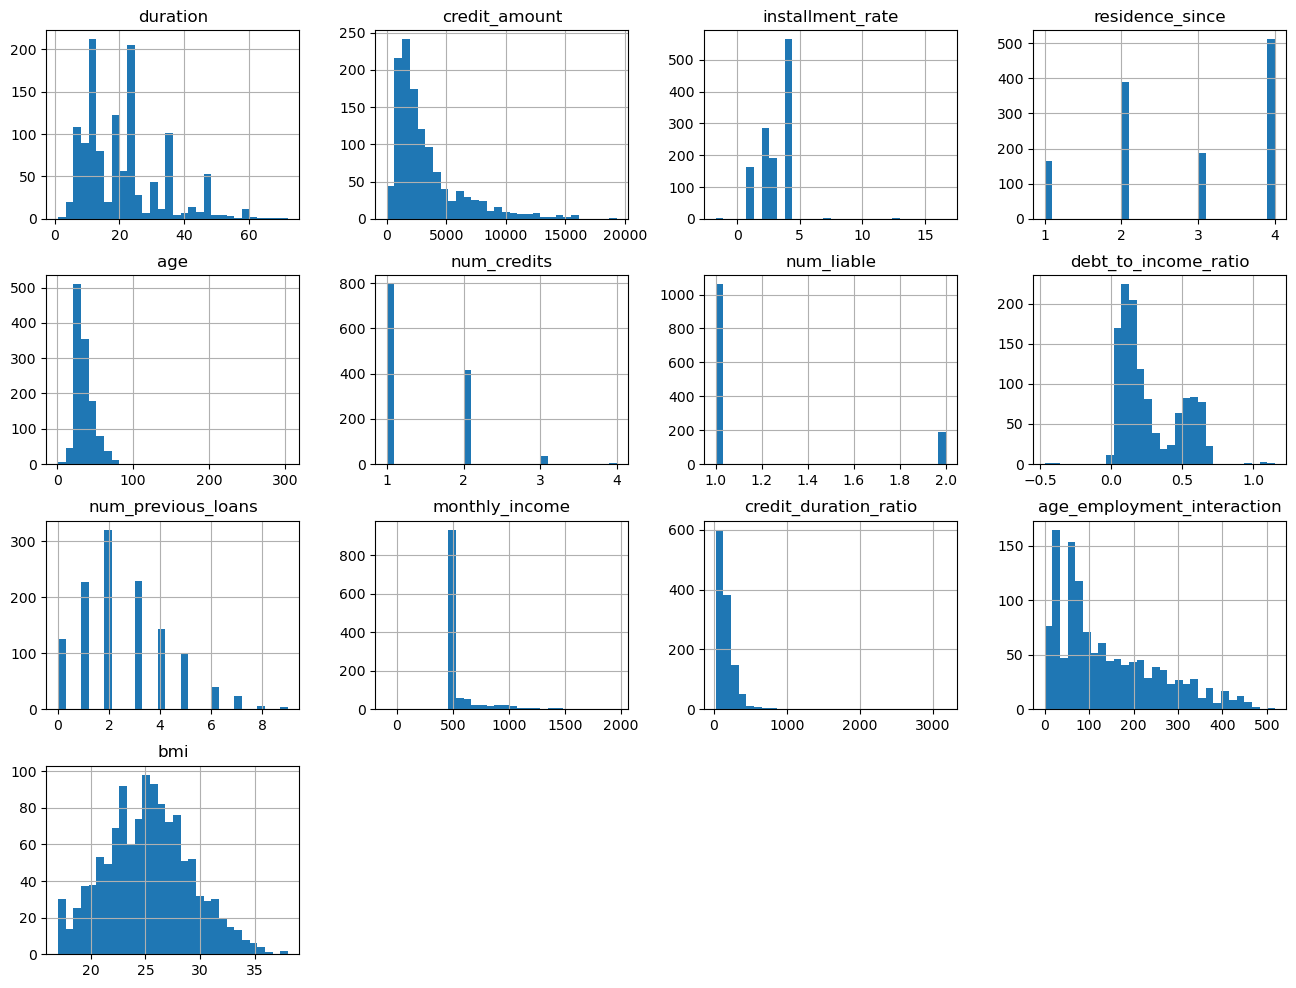

In [950]:
# Graficamos las variables númericas por medio de un histograma
df[numeric_cols].hist(figsize=(16,12), bins=30)

### Análisis de correlación de variables númericas

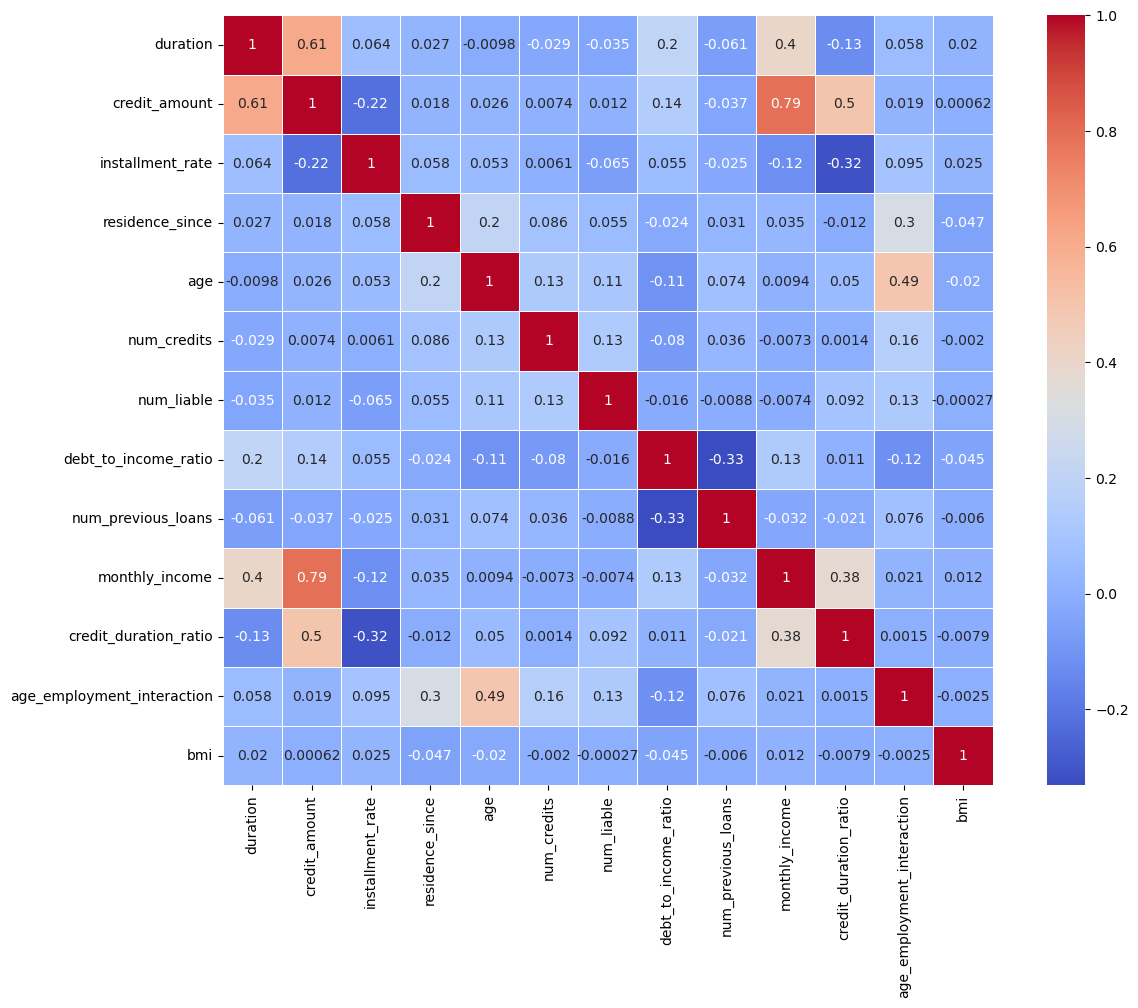

In [951]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include="number").corr(),
            fmt='.2g',
            annot=True,
            cmap="coolwarm",
            linewidth=.5,
            square=True)
plt.show()

### Visualización diagrama de barras de variables categóricas

In [952]:
#Recordatorio de variables categóricas
categorical_cols=df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['status_account', 'credit_history', 'purpose', 'savings',
       'employment_since', 'personal_status', 'other_debtors', 'property',
       'other_installments', 'housing', 'job', 'telephone', 'foreign_worker',
       'target', 'payment_behavior', 'gender'],
      dtype='object')

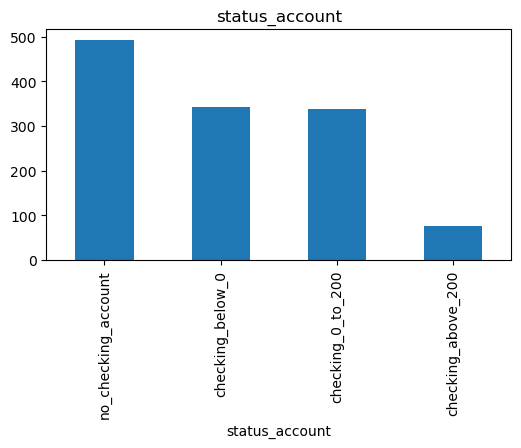

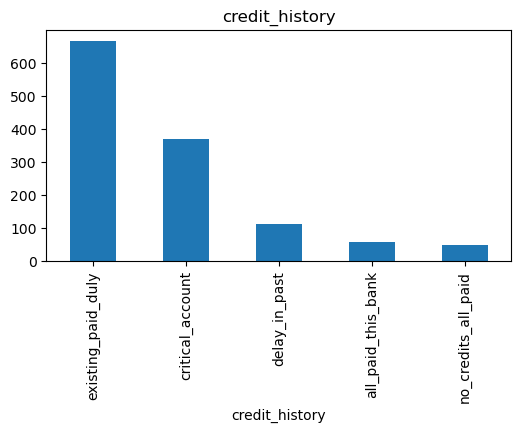

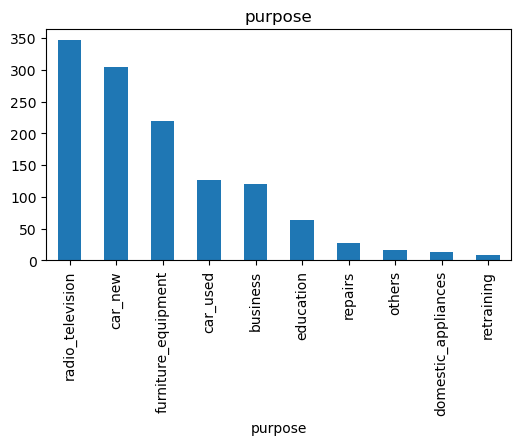

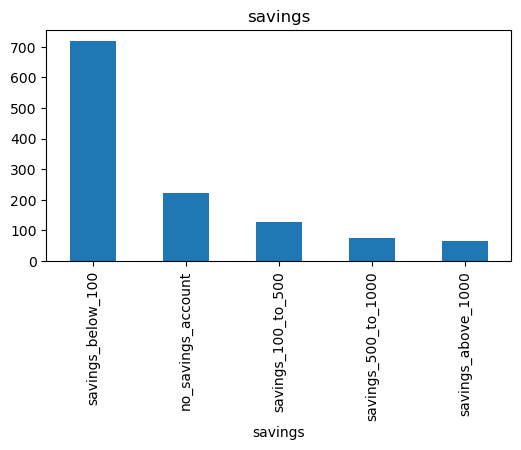

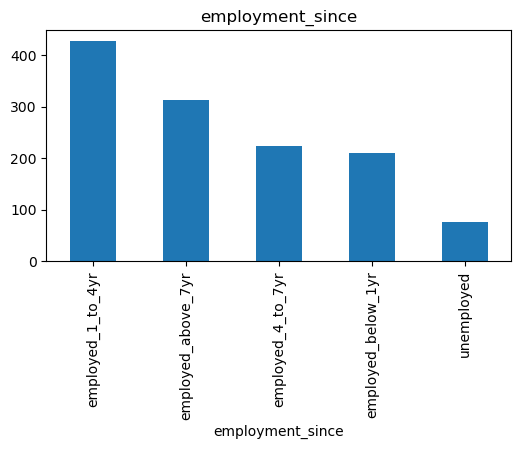

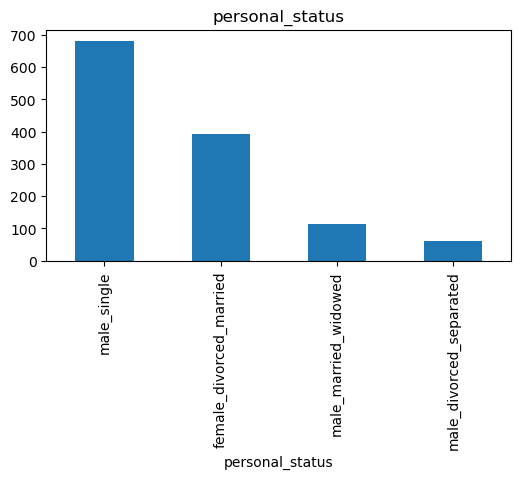

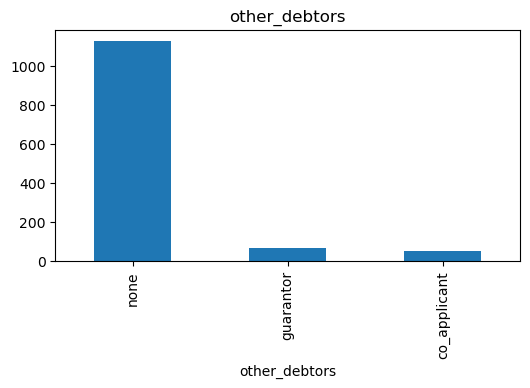

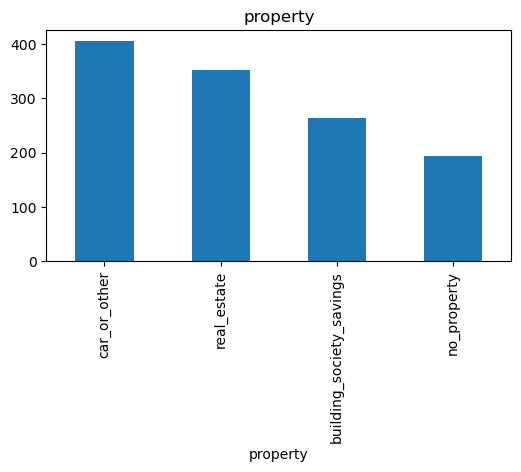

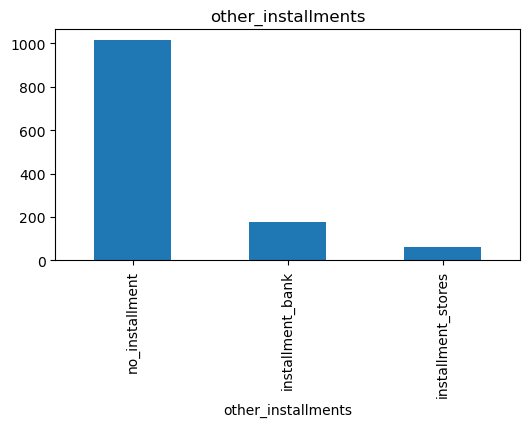

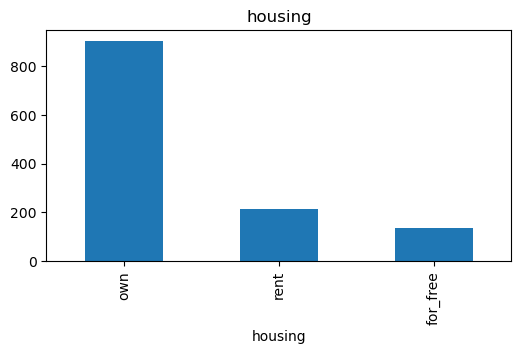

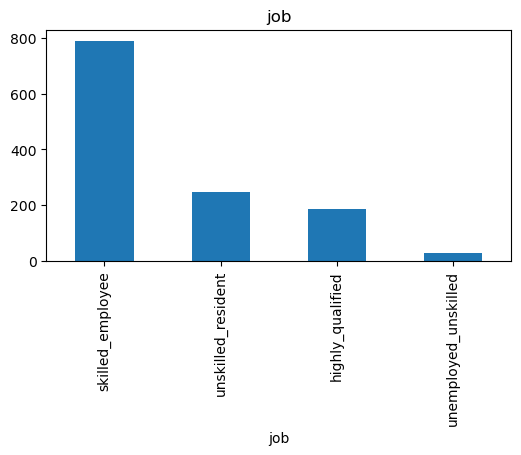

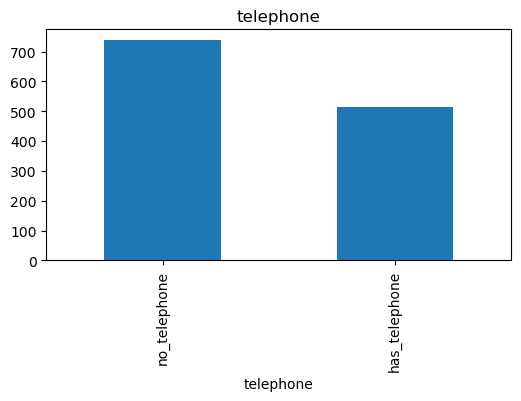

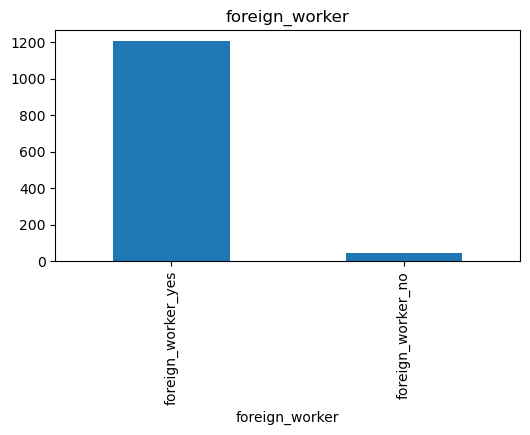

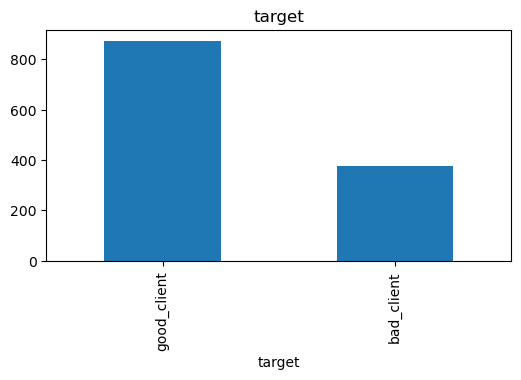

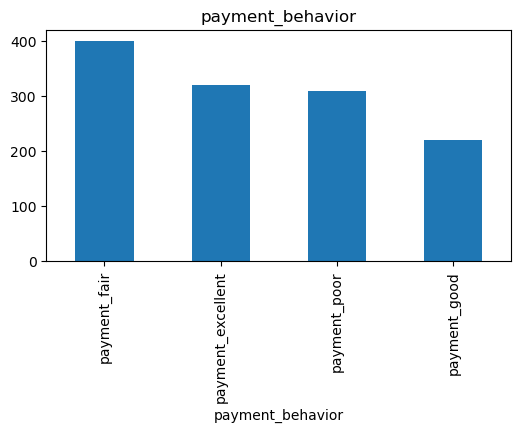

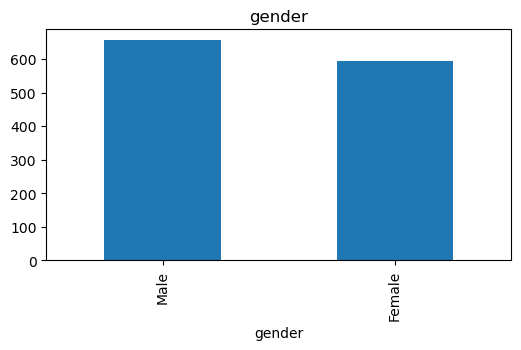

In [953]:
for col in categorical_cols: 
    df[col].value_counts().plot(kind="bar", figsize=(6,3))
    plt.title(col)
    plt.show()

In [954]:
# Generamos un analisis exploratorio de correlacion de variables 
import seaborn as sns

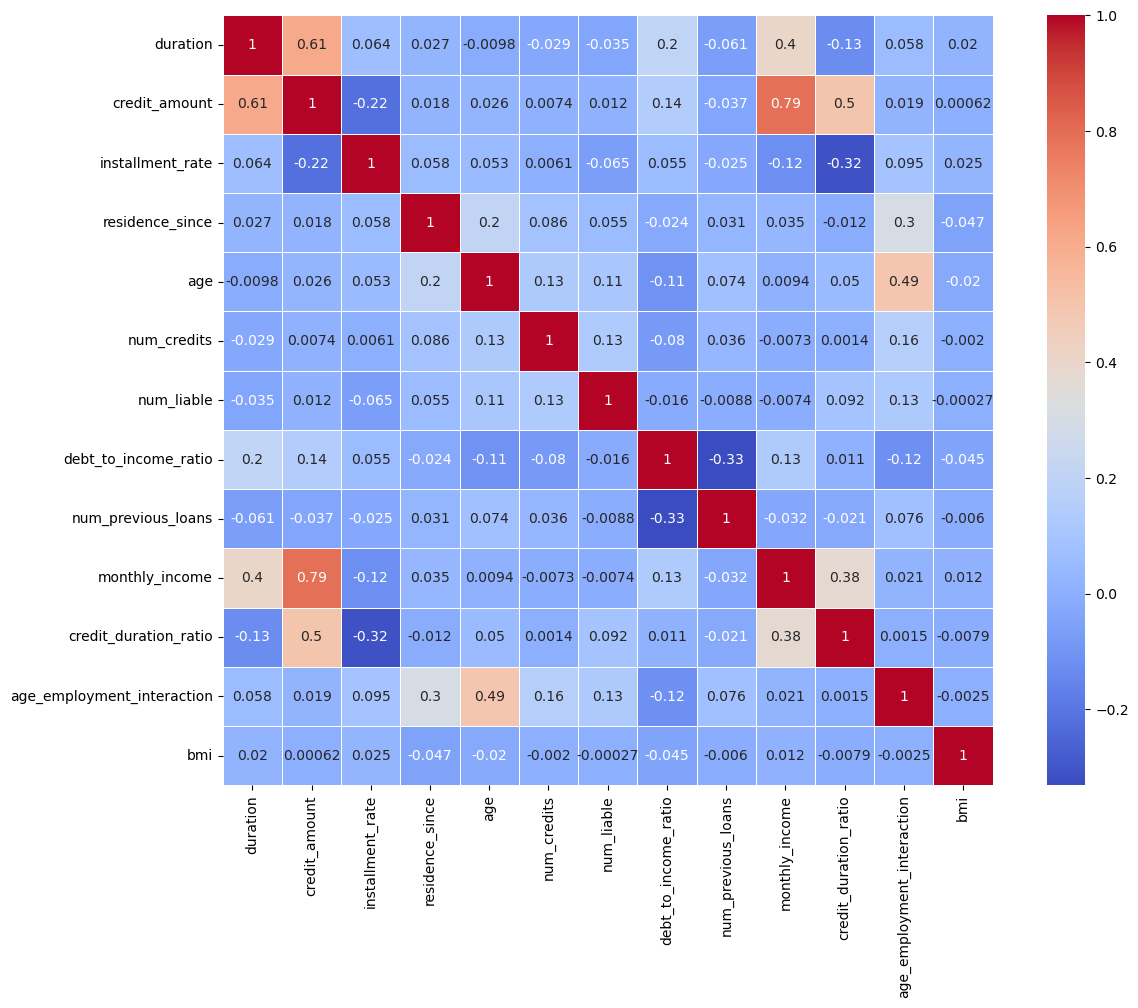

In [955]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include="number").corr(),
            fmt='.2g',
            annot=True,
            cmap="coolwarm",
            linewidth=.5,
            square=True)
plt.show()

In [956]:
#Como siguiente punto evaluamos/analizamos la cantidad de datos faltantes en nuestro dataset 
# Identifica,ps de manera global la cantidad de datos faltantes

df.isnull().sum()



status_account                 0
duration                      27
credit_history                 0
purpose                        0
credit_amount                 32
savings                       43
employment_since               0
installment_rate              34
personal_status                0
other_debtors                  0
residence_since                0
property                      34
age                           29
other_installments             0
housing                        0
num_credits                    0
job                            0
num_liable                     0
telephone                      0
foreign_worker                 0
target                         0
payment_behavior               0
debt_to_income_ratio          26
num_previous_loans            33
monthly_income                30
credit_duration_ratio         35
age_employment_interaction     0
bmi                           25
gender                         0
dtype: int64

In [957]:
#Generamos una matriz general

missing_stats=pd.DataFrame({"faltantes":df.isnull().sum(), 
                            "porcentaje":((df.isnull().sum()/len(df))*100).round(2)})
missing_stats=missing_stats[missing_stats["faltantes"]>0].sort_values(by="faltantes", ascending=False)

print ("Analisis general de cantidad de valores faltantes por columna")
print("--"*80)
print(f"\nEn total hemos identificado una cantidad de ({len(missing_stats)}) columnas con datos faltantes como muestra la siguiente tabla:")
print(f"\n{missing_stats}")
print(f"\n El atributo con mayor cantidad da valores faltantes es ({missing_stats.index[0]}) con ({missing_stats.iloc[0, 0]}) equivalente a un ({missing_stats.loc["savings", "porcentaje"]}%)")

Analisis general de cantidad de valores faltantes por columna
----------------------------------------------------------------------------------------------------------------------------------------------------------------

En total hemos identificado una cantidad de (11) columnas con datos faltantes como muestra la siguiente tabla:

                       faltantes  porcentaje
savings                       43        3.44
credit_duration_ratio         35        2.80
installment_rate              34        2.72
property                      34        2.72
num_previous_loans            33        2.64
credit_amount                 32        2.56
monthly_income                30        2.40
age                           29        2.32
duration                      27        2.16
debt_to_income_ratio          26        2.08
bmi                           25        2.00

 El atributo con mayor cantidad da valores faltantes es (savings) con (43) equivalente a un (3.44%)


## Identificación de problemas de calidad de datos

### Analisis de valores faltantes


In [958]:
# Analisis general de cantidad de valores faltantes por columna
df.isnull().sum()

status_account                 0
duration                      27
credit_history                 0
purpose                        0
credit_amount                 32
savings                       43
employment_since               0
installment_rate              34
personal_status                0
other_debtors                  0
residence_since                0
property                      34
age                           29
other_installments             0
housing                        0
num_credits                    0
job                            0
num_liable                     0
telephone                      0
foreign_worker                 0
target                         0
payment_behavior               0
debt_to_income_ratio          26
num_previous_loans            33
monthly_income                30
credit_duration_ratio         35
age_employment_interaction     0
bmi                           25
gender                         0
dtype: int64

In [959]:
### calculamos el porcentaje de valores faltantes por columna
i=0
list_colums_val_faltantes=[]
for col in df.columns:
    val_faltantes=df[col].isna().sum()
    if val_faltantes!=0:
        list_colums_val_faltantes.append(col)
        i=1+i
        print("=="*80)
        print(col)
        print(f"cantidad de valores faltantes en {col} es igual a {val_faltantes}")
        porcentaje=val_faltantes/df.shape[0]
        print(f"porcentaje de valores faltantes en {porcentaje}")
print("----"*80)
print(f"En total de dataframe presenta ({i}) columnas con valores faltantes")
print(f"Lista de columnbas con valores faltantes:{list_colums_val_faltantes}")

duration
cantidad de valores faltantes en duration es igual a 27
porcentaje de valores faltantes en 0.0216
credit_amount
cantidad de valores faltantes en credit_amount es igual a 32
porcentaje de valores faltantes en 0.0256
savings
cantidad de valores faltantes en savings es igual a 43
porcentaje de valores faltantes en 0.0344
installment_rate
cantidad de valores faltantes en installment_rate es igual a 34
porcentaje de valores faltantes en 0.0272
property
cantidad de valores faltantes en property es igual a 34
porcentaje de valores faltantes en 0.0272
age
cantidad de valores faltantes en age es igual a 29
porcentaje de valores faltantes en 0.0232
debt_to_income_ratio
cantidad de valores faltantes en debt_to_income_ratio es igual a 26
porcentaje de valores faltantes en 0.0208
num_previous_loans
cantidad de valores faltantes en num_previous_loans es igual a 33
porcentaje de valores faltantes en 0.0264
monthly_income
cantidad de valores faltantes en monthly_income es igual a 30
porcentaj

In [960]:
##En resumen en cuanto a valores faltantes:
print(f"En total de dataframe presenta ({i}) columnas con valores faltantes")
print(f"con un cantidad de valores faltantes total a ({df.isna().sum().sum()})")


En total de dataframe presenta (11) columnas con valores faltantes
con un cantidad de valores faltantes total a (348)


### Analisis de distribución de la clase Target

In [961]:
### Evaluamos la distribución de la variable categórica target
df["target"].value_counts()

target
good_client    873
bad_client     377
Name: count, dtype: int64

In [962]:
## En terminos de porecentaje
df["target"].value_counts(normalize=True, ascending=False)

target
good_client    0.6984
bad_client     0.3016
Name: proportion, dtype: float64

In [963]:
## En resumen respecto a la distribución de la variable target:
clientes_buenos_porcentaje=((df["target"]=="good_client").sum()/df.shape[0])*100
clientes_malos_porcentaje=((df["target"]=="bad_client").sum()/df.shape[0])*100
print(F"Las clase Target esta claramente desbalanceada. El {clientes_buenos_porcentaje:.2f}% son clientes buenos y el {clientes_malos_porcentaje:.2f}% son clientes malos")

Las clase Target esta claramente desbalanceada. El 69.84% son clientes buenos y el 30.16% son clientes malos


### Análisis de Validez de la data, Verificar rangos permitidos por variable

In [964]:
#Definición de rangos para cada variable según documneto german_credit_data_description.txt
rangos = {
    "duration": (4, 72),
    "credit_amount": (250, 18424),
    "installment_rate": (1,4),
    "residence_since": (1,4),
    "age": (18, 75),
    "num_credits": (1,4),
    "num_liable":(1,2),
    "monthly_income": (500, 15000),
    "debt_to_income_ratio": (0.0, 1.0),
    "num_previous_loans": (0, 10),
    "bmi":(17, 38)
}

In [965]:
#funcion de evaluacion de rangos 
fuera_de_rango = {}

for col, (min_val, max_val) in rangos.items():
    if col in df.columns:
        #Creo una lista booleana para cada columna segun sig lógica
        mask_fuera = (
            df[col].notna() & 
            ((df[col] < min_val) | (df[col] > max_val))
        )
        #Cada columna se vuelve una clave del diccionario fuera_de_rango con la sumatoria total de la lista booleana
        fuera_de_rango[col] = mask_fuera.sum()
   

In [966]:
df_fuera_rango = (
    pd.DataFrame
    .from_dict(fuera_de_rango, orient="index", columns=["fuera_rango"])
    .sort_values("fuera_rango", ascending=False)
)

In [967]:
df_fuera_rango

,fuera_rango
age,13
installment_rate,12
debt_to_income_ratio,5
credit_amount,4
monthly_income,4
duration,2
residence_since,0
num_credits,0
num_liable,0
num_previous_loans,0


In [968]:
print(f"En total se han detectado {df_fuera_rango["fuera_rango"].sum()} valores fuera de los rangos establecidos en el documento german_credit_data_description")

En total se han detectado 40 valores fuera de los rangos establecidos en el documento german_credit_data_description


In [969]:
# Consolidamos en una lista las columnas con valores fuera de rangos permitidos:
list_colums_fuera_rango=df_fuera_rango[df_fuera_rango["fuera_rango"]!=0].index.tolist()
list_colums_fuera_rango

['age',
 'installment_rate',
 'debt_to_income_ratio',
 'credit_amount',
 'monthly_income',
 'duration']

### Análisis de Outliers


In [970]:
#Como primer punto de partida recordamos las variables númericas a trratar con posibles outliers:
for idx, col in enumerate (df[numeric_cols]):
    print(idx, col)

0 duration
1 credit_amount
2 installment_rate
3 residence_since
4 age
5 num_credits
6 num_liable
7 debt_to_income_ratio
8 num_previous_loans
9 monthly_income
10 credit_duration_ratio
11 age_employment_interaction
12 bmi


In [971]:
# A pesar de tener 13 variables numericas en nuestro dataset. Los metodos de Outliers son tienen sentido en variables numericas continuas
# Por lo que el tratamiento de Outliers se limitara unicamente a las variables continuas 
print("Existen 13 variables númericas en el df original pero no todas son continuas. " \
"Solo en variables continuas se aplicara el analisis y tratamiento de Outliers")
print("=="*80)
print("\nLISTADO VARIABLES NUM. CONTINUAS")
print("=="*17)
print(f"Listado de variables numercias continuas para analisis y tratamiento de outliers son ({len(continuas)}):")
print(f"\n{continuas}")
print("=="*80)
print("\nLISTADO VARIABLES NUM. DISCRETAS")
print("=="*17)
print(f"Listado de variables numercias DISCRETAS CATEGORICAS ({len(discretas)}):")
print(f"\n{discretas}")


Existen 13 variables númericas en el df original pero no todas son continuas. Solo en variables continuas se aplicara el analisis y tratamiento de Outliers

LISTADO VARIABLES NUM. CONTINUAS
Listado de variables numercias continuas para analisis y tratamiento de outliers son (8):

['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']

LISTADO VARIABLES NUM. DISCRETAS
Listado de variables numercias DISCRETAS CATEGORICAS (5):

['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']


#### Z-Score

In [972]:
## Z-Score

def detect_outliers_z_score(data, threshold):
    Z_score=np.abs(stats.zscore(data))
    return Z_score > threshold

outliers_zscore={}

for col in (df[continuas]):
    outliers_zscore[col]=detect_outliers_z_score(df[col], 3)
    # n_outliers=(outliers_zscore[col]==True).sum()
    # l=len(df)
    #print(f"Atributo:{col}, presenta {n_outliers}, que corresponde a un porcentaje de {round((n_outliers/l)*10,2)}")
zscore_results=[]
for col in continuas:
    num_outliers=outliers_zscore[col].sum()
    l=len(df[continuas])
    zscore_results.append({"Atributo":col,"Num_Outliers":num_outliers, "Porcentaje":round((num_outliers/l)*10,2)  })

df_outliers_zscore=pd.DataFrame(zscore_results).sort_values(by="Num_Outliers", ascending=False)
df_outliers_zscore.head(10)

,Atributo,Num_Outliers,Porcentaje
5,age_employment_interaction,1,0.01
0,duration,0,0.00
1,credit_amount,0,0.00
2,debt_to_income_ratio,0,0.00
3,monthly_income,0,0.00
4,credit_duration_ratio,0,0.00
6,bmi,0,0.00
7,age,0,0.00


In [973]:
#Guardamos los resultados globales del analisis individual por atributo de outliers con el metodo z-score
Total_outliers_zscore=df_outliers_zscore["Num_Outliers"].sum()
Total_perc_zscore=round(Total_outliers_zscore/len(df)*100,2)
results_zscore={"N Outliers":Total_outliers_zscore, "Porcentaje":Total_perc_zscore} 

print(f"Z-score detectó {Total_outliers_zscore} outliers")
print(f"Porcentaje: {Total_perc_zscore}%")

Z-score detectó 1 outliers
Porcentaje: 0.08%


#### IQR (Rango Intercuartílico)

In [974]:
def detect_outliers_iqr(data, multiplier):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return (data < lower_bound) | (data > upper_bound)

outliers_iqr={}

for col in continuas:
    outliers_iqr[col]=detect_outliers_iqr(df[col], 1.5)

results_outliers_iqr=[]
for col in continuas:
    n_outliers=outliers_iqr[col].sum()
    l=len(df[continuas])
    porcentaje=round((n_outliers/l)*100,2)
    results_outliers_iqr.append({"Atributo":col,"Num_Outliers":n_outliers, "Porcentaje":porcentaje})

df_outliers_iqr=pd.DataFrame(results_outliers_iqr).sort_values(by="Num_Outliers", ascending=False)
df_outliers_iqr

,Atributo,Num_Outliers,Porcentaje
3,monthly_income,308,24.64
1,credit_amount,98,7.84
0,duration,89,7.12
4,credit_duration_ratio,48,3.84
7,age,40,3.20
5,age_employment_interaction,10,0.80
2,debt_to_income_ratio,4,0.32
6,bmi,4,0.32


In [975]:
#Guardamos los resultados globales del analisis individual por atributo de outliers con el metodo IQR
Total_outliers_iqr=df_outliers_iqr["Num_Outliers"].sum()
Total_perc_iqr=round(Total_outliers_iqr/len(df)*100,2)
results_iqr={"N Outliers":Total_outliers_iqr, "Porcentaje":Total_perc_iqr} 

print(f"IQR detectó {Total_outliers_iqr} outliers")
print(f"Porcentaje: {Total_perc_iqr}%")

IQR detectó 601 outliers
Porcentaje: 48.08%


In [976]:
## Consolidación lista de columnas con outliers detectados:
list_outliers_detected_iqr=df_outliers_iqr["Atributo"].tolist()
list_outliers_detected_iqr


['monthly_income',
 'credit_amount',
 'duration',
 'credit_duration_ratio',
 'age',
 'age_employment_interaction',
 'debt_to_income_ratio',
 'bmi']

#### Isolation Forest (isolation forest)


In [977]:
## Tratamiento de Outliers Basados en Modelos
#A diferencia de los métodos estadísticos univariados, los modelos LOF e Isolation Forest identifican anomalías a nivel de observación completa, evaluando la combinación multivariada de atributos. Por tanto, el outlier detectado corresponde a la fila completa y no a un atributo individual.

#detecta observaciones “raras” en conjunto

#no te dice qué variable causó el outlier
from sklearn.ensemble import IsolationForest
outliers={}
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iso = iso_forest.fit_predict(df[continuas])


#Identifica con -1 los outliers
outliers['outlier_iso'] = outliers_iso == -1

Total_outliers_iso=outliers['outlier_iso'].sum()
Total_perc_iso=round(Total_outliers_iso/len(df)*100,2)
results_iso={"N Outliers":Total_outliers_iso, "Porcentaje":Total_perc_iso}

print(f"Isolation Forest detectó {Total_outliers_iso} outliers")
print(f"Porcentaje: {Total_perc_iso}%")

Isolation Forest detectó 63 outliers
Porcentaje: 5.04%


#### Local Outlier Factor (LOF)

In [978]:
#### Local Outlier Factor (LOF)

#Escalado variables continuas numericas
scaler=StandardScaler()
continuas_scaled=scaler.fit_transform(df[continuas].dropna())
outliers_lof={}
#Definicion lof
lof=LocalOutlierFactor(n_neighbors=5, contamination=0.05, metric="euclidean")
outliers_lof=lof.fit_predict(continuas_scaled)

outliers["outlier_LOF"]= outliers_lof == -1

Total_outliers_lof=outliers["outlier_LOF"].sum()
Total_perc_lof=round(Total_outliers_lof/len(df)*100,2)
results_lof={"N Outliers":Total_outliers_lof, "Porcentaje":Total_perc_lof}


print("Predicion modelo LOF concluido")
print(f"Local Outlier Factor detectó {Total_outliers_lof} outliers")
print(f"Porcentaje: {Total_perc_lof}%")

Predicion modelo LOF concluido
Local Outlier Factor detectó 57 outliers
Porcentaje: 4.56%


#### DBSCAN

In [979]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[continuas].dropna())

dbscan = DBSCAN(eps=1.2, min_samples=2, metric="euclidean")
clusters = dbscan.fit_predict(df_scaled)
outliers['outlier_dbscan'] = clusters == -1

Total_outliers_dbscan=outliers['outlier_dbscan'].sum()
Total_perc_dbscan=round(Total_outliers_dbscan/len(df)*100,2)
results_dbscan={"N Outliers":Total_outliers_dbscan, "Porcentaje":Total_perc_dbscan}

print(f"DBSCAN detectó {Total_outliers_dbscan} outliers")
print(f"Porcentaje: {Total_perc_dbscan}%")

DBSCAN detectó 171 outliers
Porcentaje: 13.68%


#### Comparación global distintos Métodos 

In [980]:
#. Comparación de Métodos 

Metodo=["Z-score",
        "IQR",
        "ISO",
        "LOF",
        "DBSCAN"]
results=[results_zscore, results_iqr, results_iso, results_lof, results_dbscan]
print(results[0]["N Outliers"])

outliers_list_results=[]
i=0
while i < len(Metodo):
        outliers_list_results.append({"metodo":Metodo[i], "N Outliers":results[i]["N Outliers"], "porcentaje": results[i]["Porcentaje"] })
        i=i+1
df_outliers_results=pd.DataFrame(outliers_list_results).sort_values(by="N Outliers", ascending=False)
df_outliers_results.head()

1


,metodo,N Outliers,porcentaje
1,IQR,601,48.08
4,DBSCAN,171,13.68
2,ISO,63,5.04
3,LOF,57,4.56
0,Z-score,1,0.08


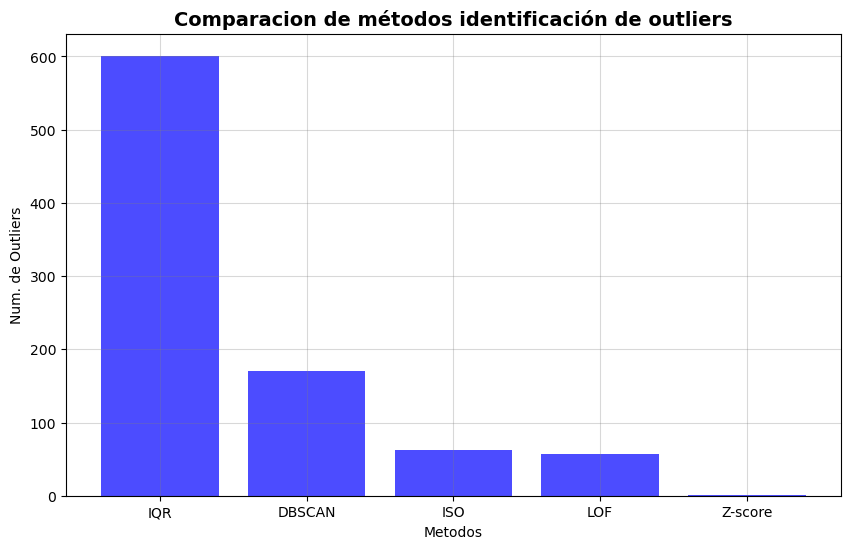

In [981]:
plt.figure(figsize=(10,6))
plt.bar(df_outliers_results["metodo"], df_outliers_results["N Outliers"], color="blue", alpha=.7)
plt.title("Comparacion de métodos identificación de outliers", fontweight="bold", fontsize=14)
plt.xlabel("Metodos")
plt.ylabel("Num. de Outliers")
plt.grid(True, alpha=0.3, c="grey")
plt.show()

## Análisis de correlaciones

In [982]:
df_num = df.select_dtypes(include="number")
corr_matrix = df_num.corr(method="spearman")

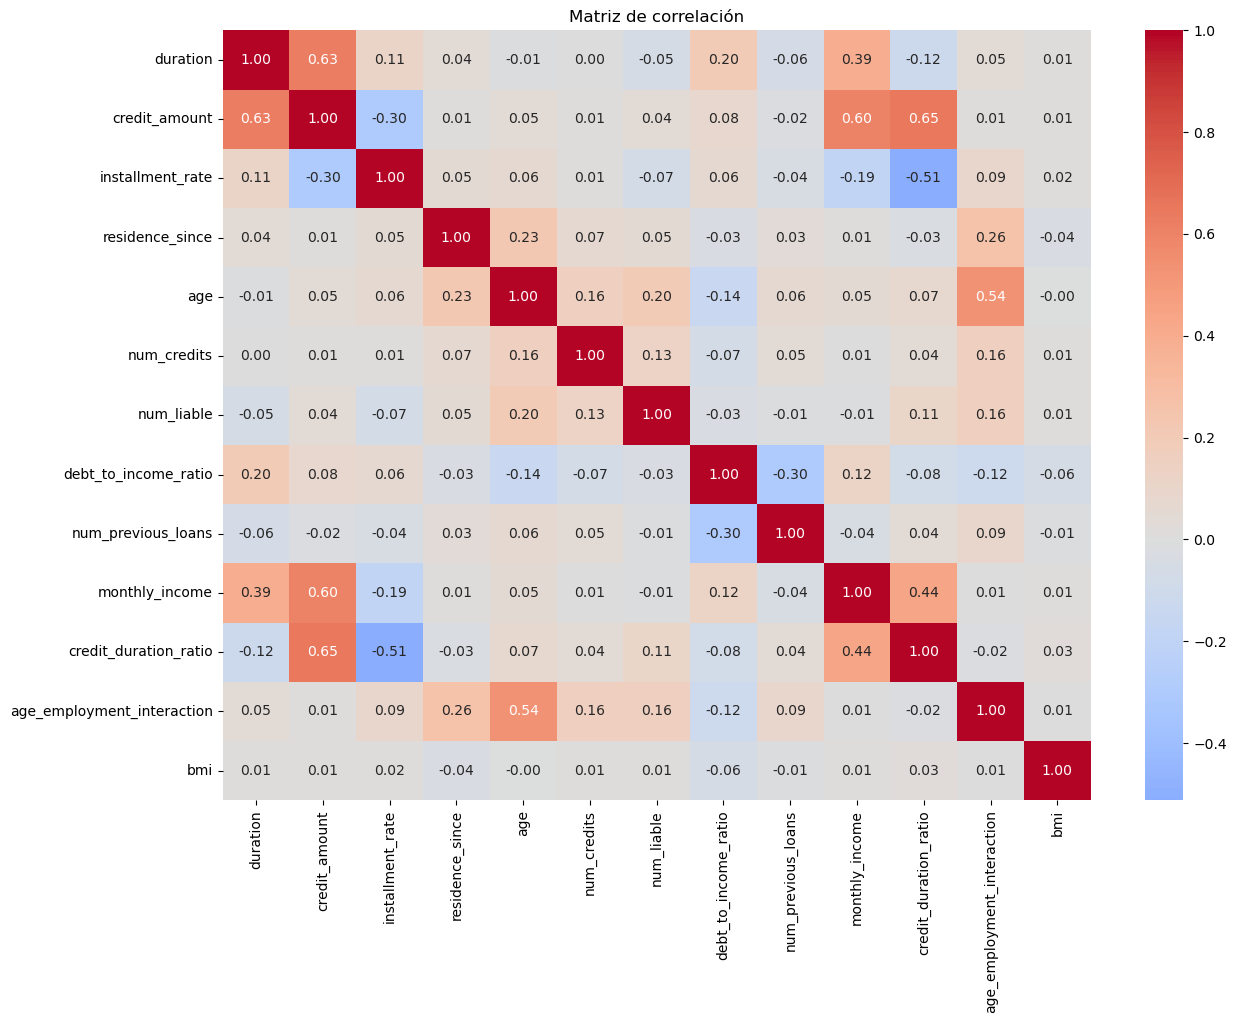

In [983]:

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("Matriz de correlación")
plt.show()

## Detección visual de outliers y valores faltantes


#### Boxplot Outliers

C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_21784\2582848149.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


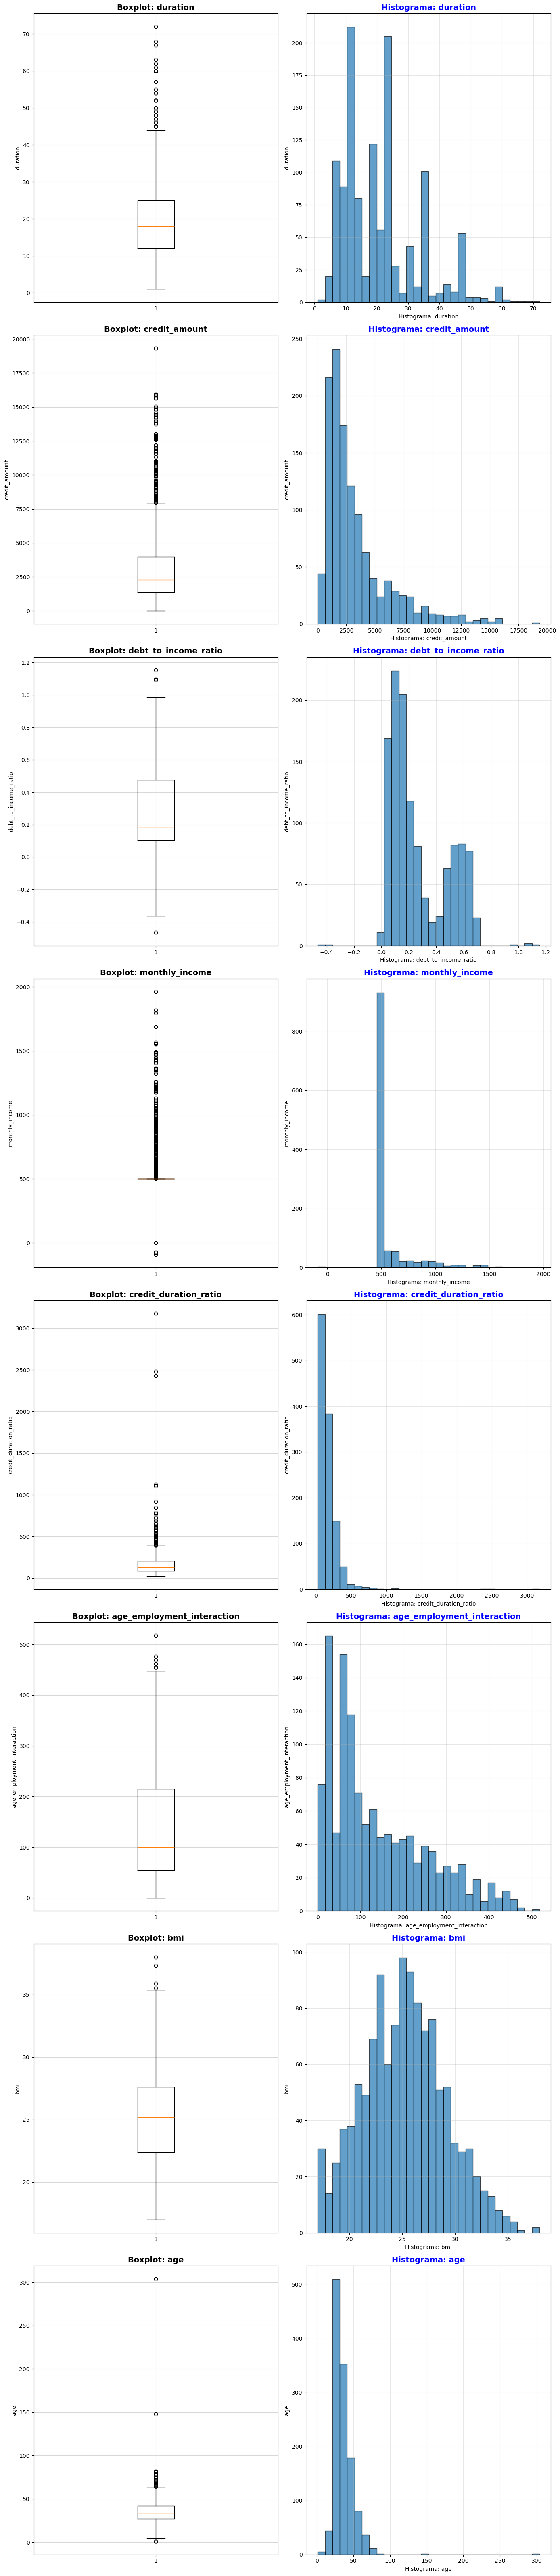

In [984]:
#### Detección visual de Outliers con boxplot

ancho_individual=7
alto_individual=8
nrows=len(continuas)
ncols=2
ancho_global=ancho_individual*ncols
alto_golbal=alto_individual*nrows

fig, axes=plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ancho_global, alto_golbal),
    constrained_layout=True
)

#Ploteamos primero el boxplot en la primera fila 

for idx, col in enumerate (continuas):
    axes[idx, 0].boxplot(df[col].dropna())
    axes[idx, 0].set_title(f"Boxplot: {col}", fontsize=14, fontweight="bold", c="black")
    axes[idx, 0].set_ylabel(f"{col}")
    axes[idx, 0].grid(alpha=0.3, c="grey")

#Ahora ploteamos en la segunda fila un histogrma para la misma variable justo debajo
    axes[idx, 1].hist(df[col], bins=30, edgecolor="black", alpha=0.7)
    axes[idx, 1].set_title(f"Histograma: {col}", fontsize=14, fontweight="bold", color="Blue")
    axes[idx,1].set_ylabel(f"{col}")
    axes[idx,1].set_xlabel(f"Histograma: {col}")
    axes[idx,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


#### Matriz visual de valores faltantes

<Figure size 2500x1000 with 0 Axes>

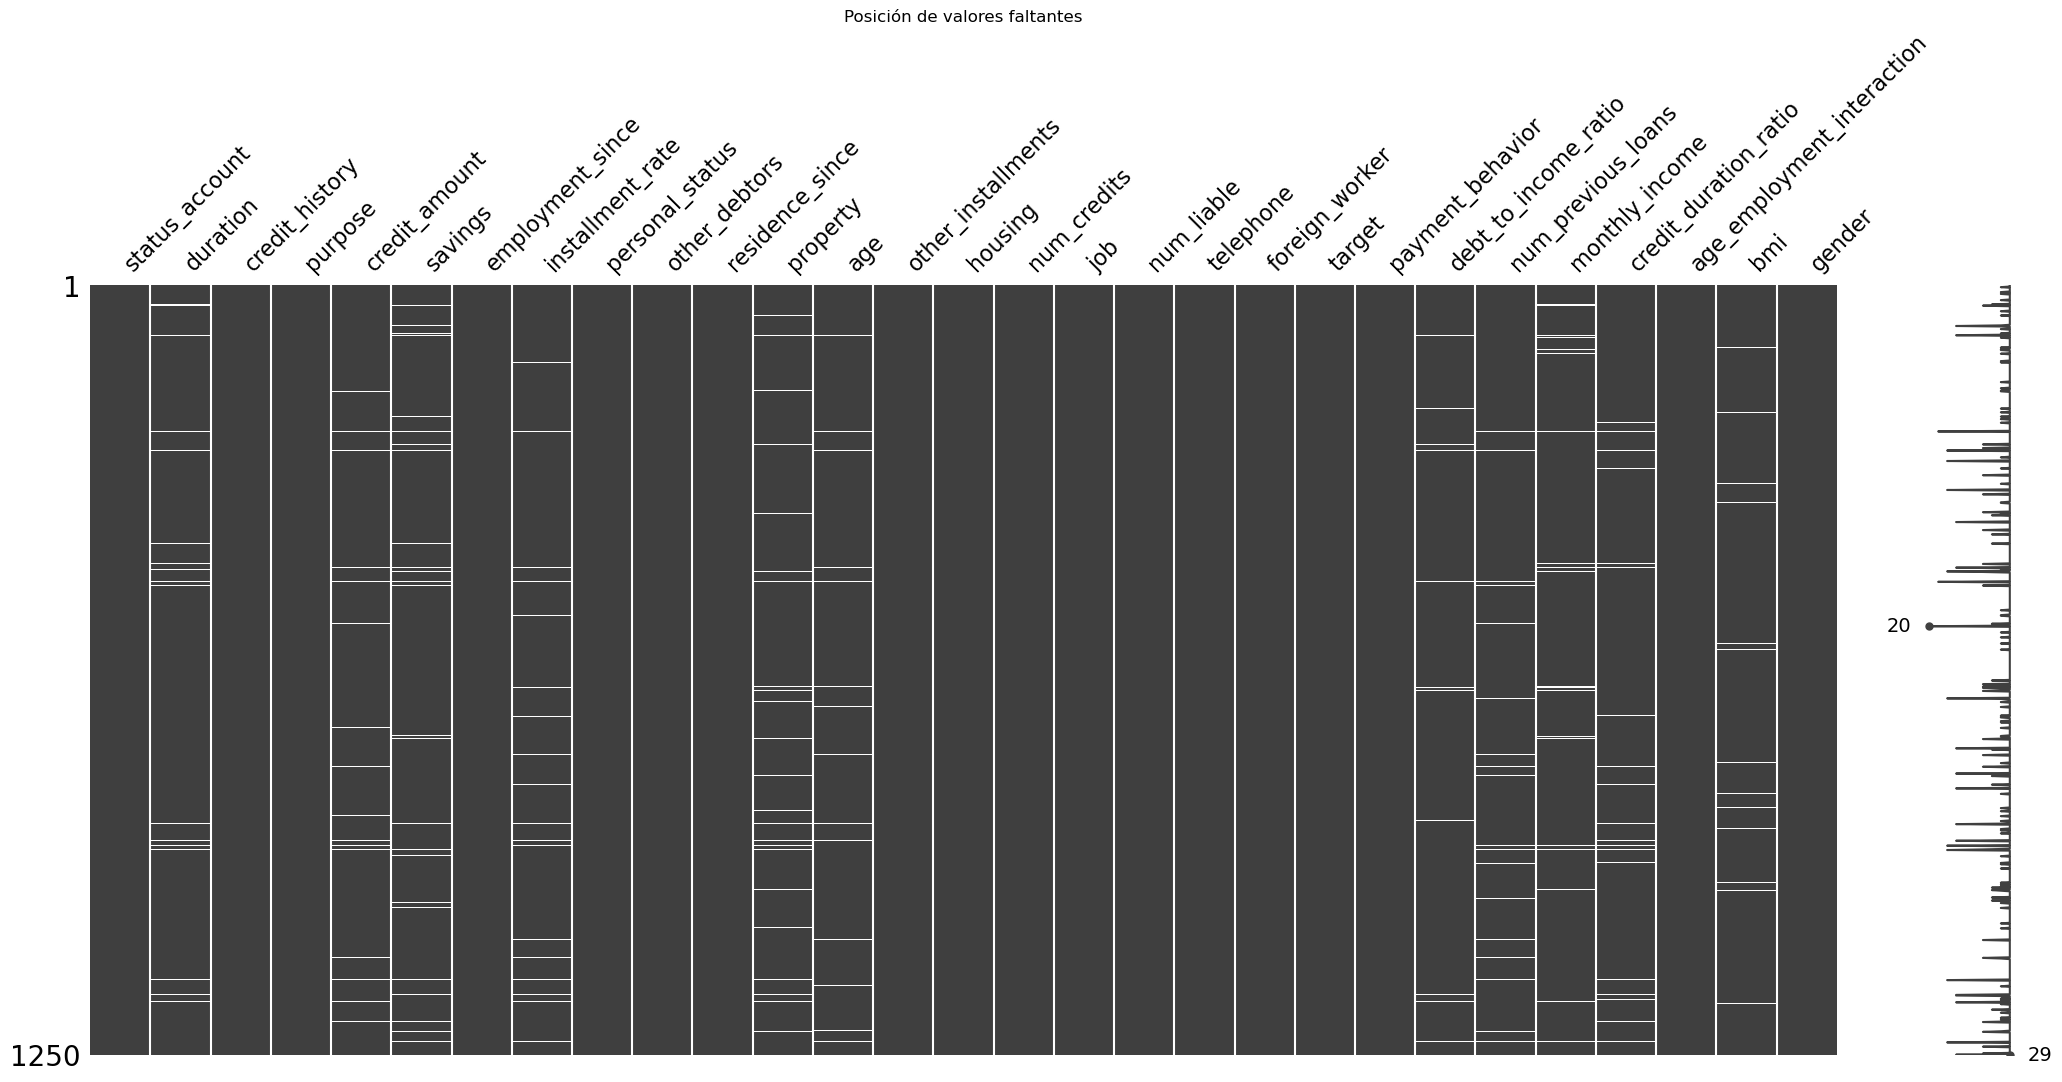

In [985]:
import missingno as msno

plt.figure(figsize=(25, 10))
msno.matrix(df)
plt.title("Posición de valores faltantes")
plt.show()

#### Heatmap de correlación de valores faltantes

<Figure size 1500x1200 with 0 Axes>

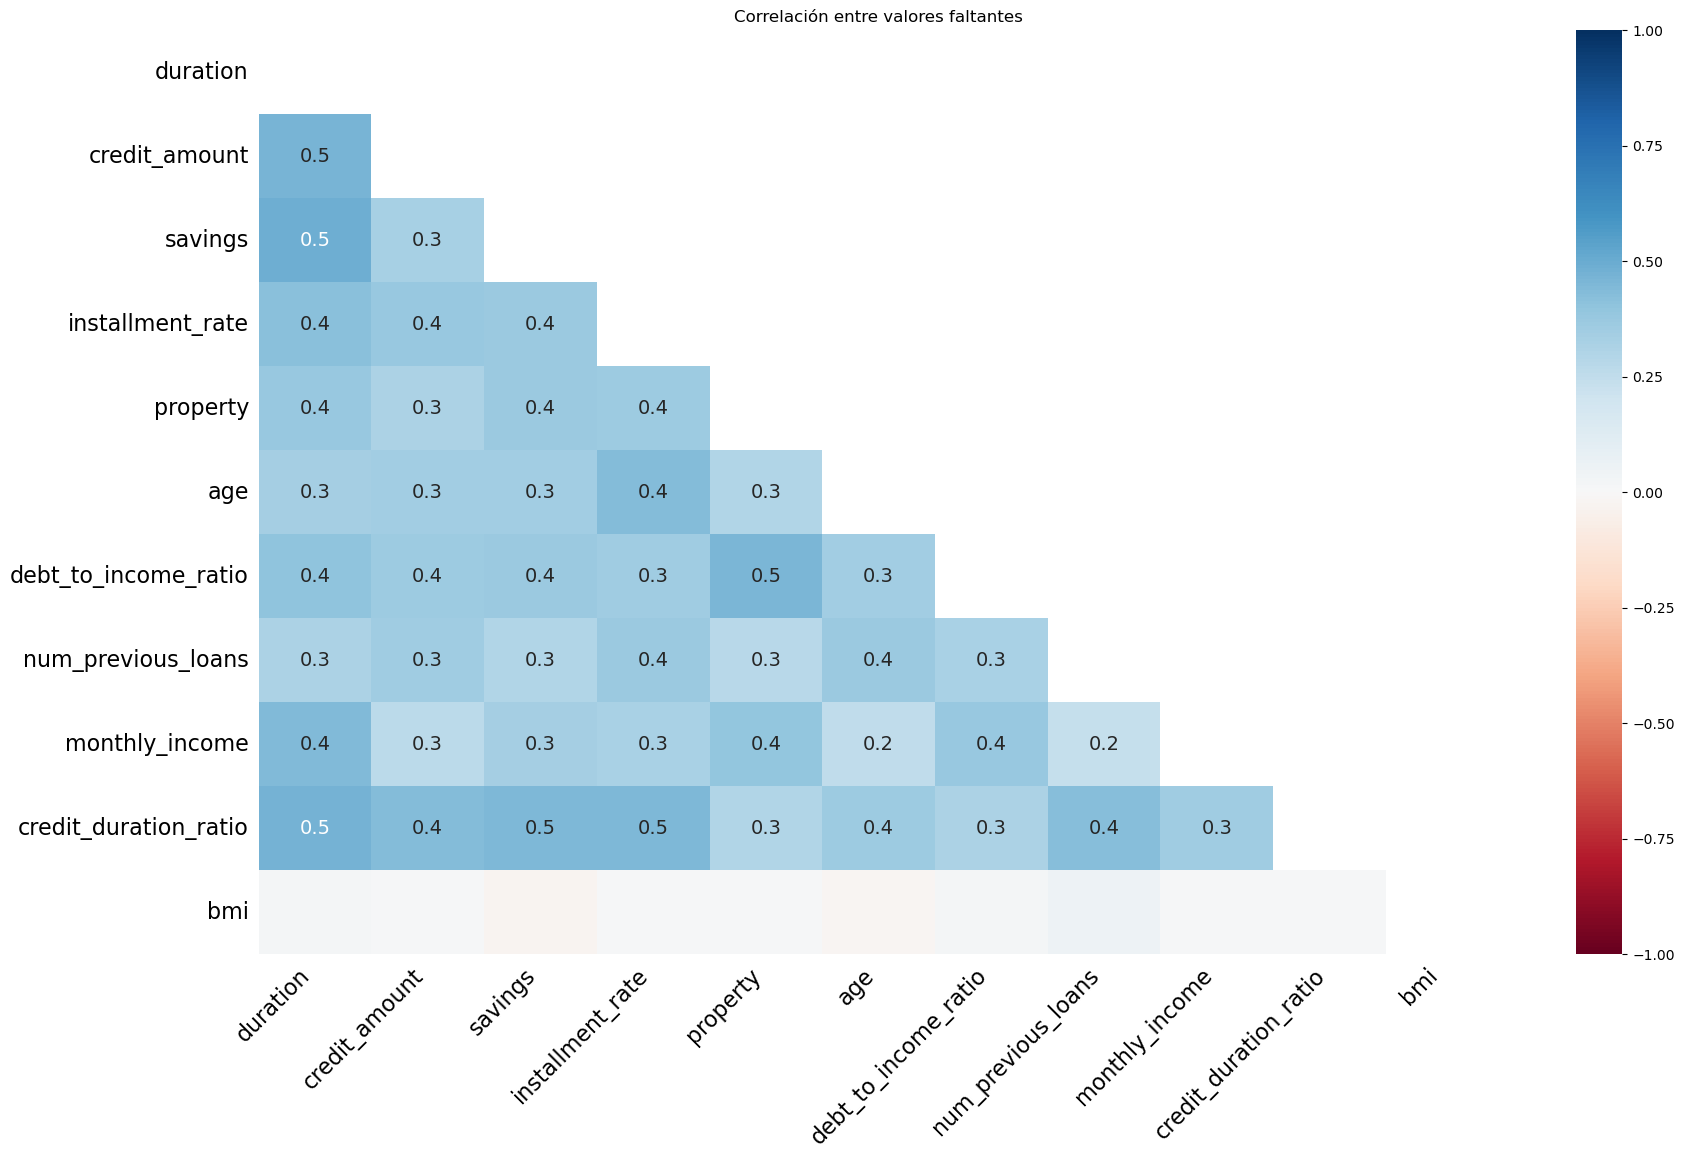

In [986]:
plt.figure(figsize=(15, 12))
msno.heatmap(df)
plt.title("Correlación entre valores faltantes")
plt.show()

#### Barras de valores faltantes por columna

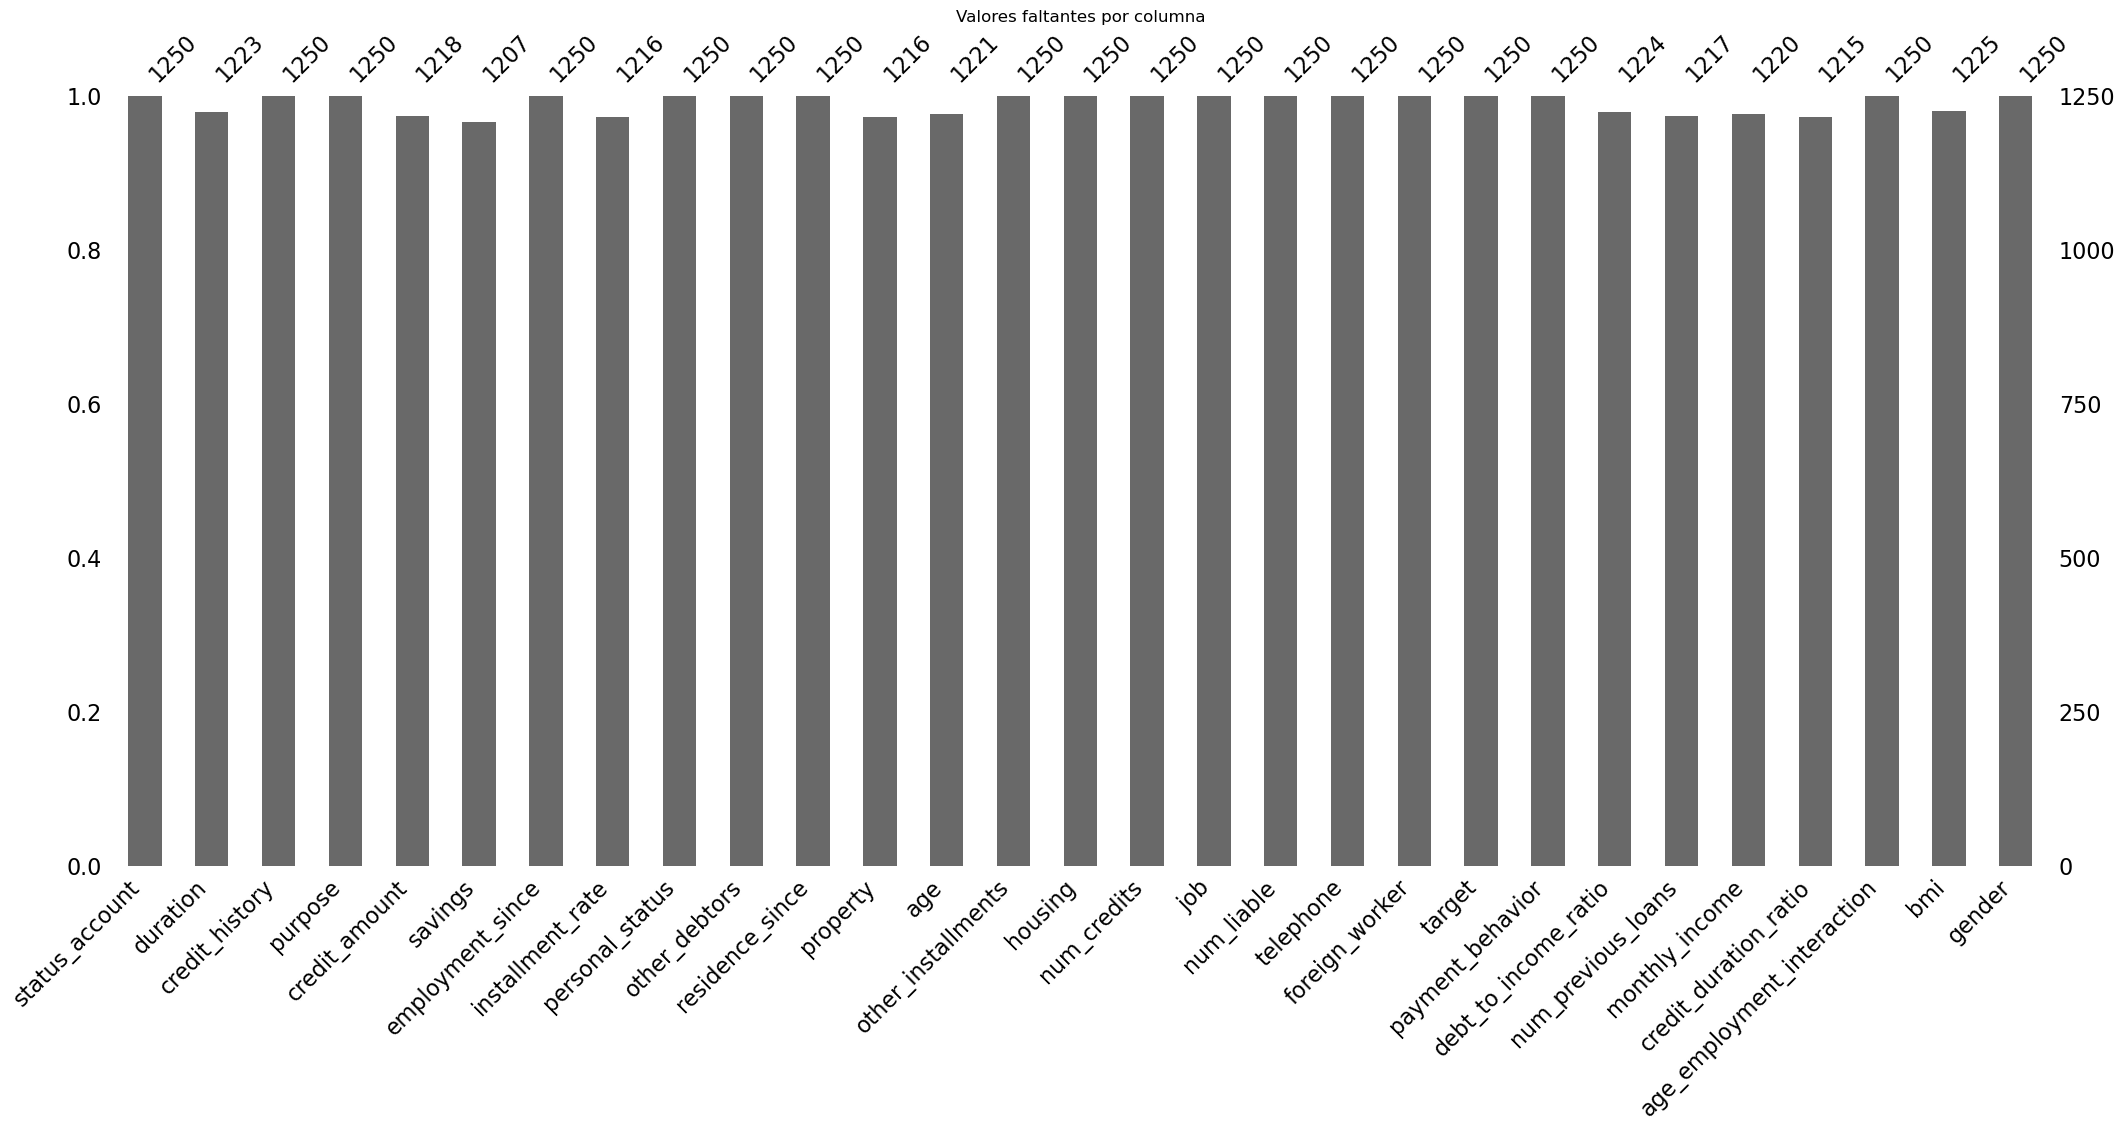

In [987]:
plt.figure(figsize=(25, 10))
msno.bar(df)
plt.title("Valores faltantes por columna")
plt.show()

#### Análisis de Patrones de Missingness

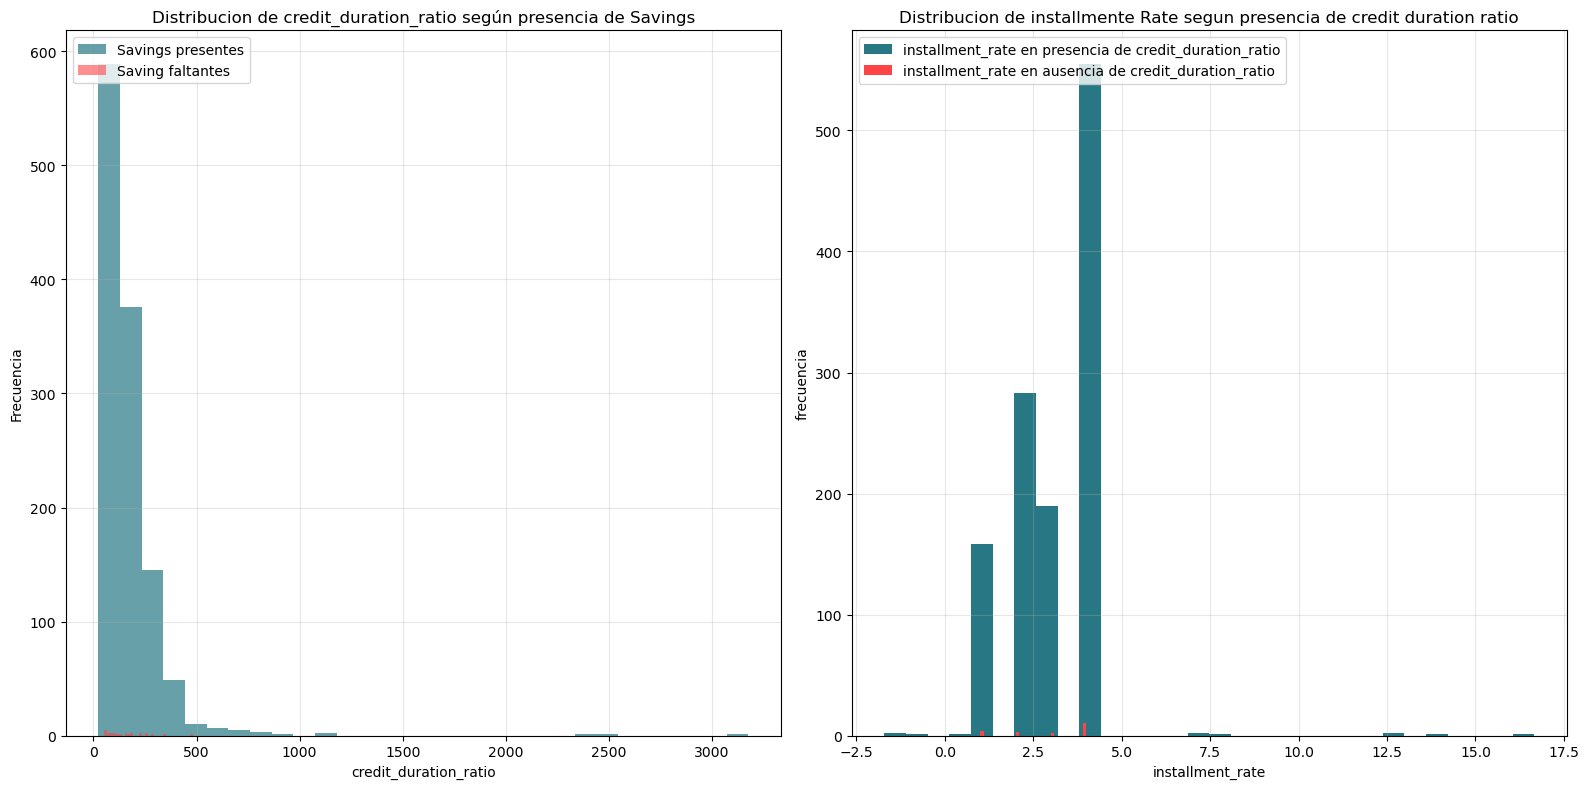

In [988]:
# Vamos a analizar si los valores faltantes de savings dependen de credit_duration_ratio (MAR)

#Distribucion de credit_duration_ratio segun conocimiento de savings 

fig, axes= plt.subplots(1,2, figsize=(16,8))
axes[0].hist(df[df["savings"].notna()]["credit_duration_ratio"], bins=30, label="Savings presentes", alpha=0.7, color="#277884")
axes[0].hist(df[df["savings"].isna()]["credit_duration_ratio"], bins=30, label="Saving faltantes", alpha=0.6, color='#FE4447')
axes[0].set_xlabel("credit_duration_ratio")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribucion de credit_duration_ratio según presencia de Savings")
axes[0].legend(loc="upper left")
axes[0].grid(alpha=0.3)

# Analizamos la distribucion installment rate en presencia de credit_duration_ratio (MAR)
axes[1].hist(df[df["credit_duration_ratio"].notna()]["installment_rate"], bins=30, label="installment_rate en presencia de credit_duration_ratio", color="#277884")
axes[1].hist(df[df["credit_duration_ratio"].isna()]["installment_rate"], bins=30, label="installment_rate en ausencia de credit_duration_ratio", color='#FE4447')
axes[1].set_xlabel("installment_rate")
axes[1].set_ylabel("frecuencia")
axes[1].set_title("Distribucion de installmente Rate segun presencia de credit duration ratio")
axes[1].legend(loc="upper left")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Resumen EDA

### Resumen EDA variables númericas continuas

In [989]:
### Consolidamos nuestras observaciones en un solo dataframe con todas las observaciones anteriormente detectadas.
### Un dataframe resumen para variables numericas continuas y otro para variables númericas discretas

In [990]:
### Partiendo del dataframe de la distribución de variables numericas (df_distribucion) le agregaremos todas las observaciones detectadas anteriormente
df_EDA_resumen_num_continuas=df_distribucion_continuas.copy()
df_EDA_resumen_num_continuas

,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal
3,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda
4,credit_duration_ratio,9.126657,Asimetrica +,130.36,Puntiaguda
5,age_employment_interaction,0.894230,Asimetrica +,-0.06,Normal
6,bmi,0.169586,Simetrica,-0.24,Normal
7,age,6.132432,Asimetrica +,98.74,Puntiaguda


In [991]:
#### Agregamos clasificación segun tipo de variable númerica (Continua =True)
df_EDA_resumen_num_continuas["Continua"]=df_EDA_resumen_num_continuas["Atributo"].isin(continuas)==True

### Agregamos columna de identificacion de columnas númericas con valores fuera del rango permitido
df_EDA_resumen_num_continuas["Valores fuera de rango"]=df_EDA_resumen_num_continuas["Atributo"].isin(list_colums_fuera_rango)==True

### Agregamos columna de identificacion de columnas númericas con valores faltantes (con NAN)
df_EDA_resumen_num_continuas["Valores faltantes"]=df_EDA_resumen_num_continuas["Atributo"].isin(list_colums_val_faltantes)==True

### Agregamos imputación sugerida según tipo de distribución: 
mapeo = {
    "Simetrica": "media",
    "Asimetrica +": "mediana",
    "Asimetrica -": "mediana"
}

df_EDA_resumen_num_continuas["Imputacion simple sugerida"] =df_EDA_resumen_num_continuas["Clasificacion skew"].map(mapeo)


### Agregamos columna de identificación de columnas númericas continuas con outliers detectados segun IQR
df_EDA_resumen_num_continuas["Outliers detectados"]=df_EDA_resumen_num_continuas["Atributo"].isin(list_outliers_detected_iqr)==True

df_EDA_resumen_num_continuas

,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis,Continua,Valores fuera de rango,Valores faltantes,Imputacion simple sugerida,Outliers detectados
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda,True,True,True,mediana,True
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda,True,True,True,mediana,True
2,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal,True,True,True,mediana,True
3,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda,True,True,True,mediana,True
4,credit_duration_ratio,9.126657,Asimetrica +,130.36,Puntiaguda,True,False,True,mediana,True
5,age_employment_interaction,0.894230,Asimetrica +,-0.06,Normal,True,False,False,mediana,True
6,bmi,0.169586,Simetrica,-0.24,Normal,True,False,True,media,True
7,age,6.132432,Asimetrica +,98.74,Puntiaguda,True,True,True,mediana,True


### Resumen EDA variables numéricas discretas

In [992]:
#Ahora formulamos un resumen EDA en dataframe para variables númericas discretas:
df_EDA_resumen_num_discretas=pd.DataFrame({"Atributo":discretas})



In [993]:
#### Agregamos columna de asignación de tipo de variable númerica
df_EDA_resumen_num_discretas["Discreta"]=True

#### Agregamos la Clasificación de variables numericas discretas
df_EDA_resumen_num_discretas["Tipo"]=df_EDA_resumen_num_discretas["Atributo"].map(tipo_discretas)

### Agregamos columna de identificacion de columnas númericas con valores fuera del rango permitido
df_EDA_resumen_num_discretas["Valores fuera de rango"]=df_EDA_resumen_num_discretas["Atributo"].isin(list_colums_fuera_rango)==True

### Agregamos columna de identificacion de columnas númericas con valores faltantes (con NAN)
df_EDA_resumen_num_discretas["Valores faltantes"]=df_EDA_resumen_num_discretas["Atributo"].isin(list_colums_val_faltantes)==True

## Cantidad de valores unicos por variable discreta (no se cuentan NaN)
df_EDA_resumen_num_discretas["Valores unicos"]=df_EDA_resumen_num_discretas["Atributo"].map(unique_values_discretas)

df_EDA_resumen_num_discretas["Imputacion sugerida"]="moda"

df_EDA_resumen_num_discretas



,Atributo,Discreta,Tipo,Valores fuera de rango,Valores faltantes,Valores unicos,Imputacion sugerida
0,installment_rate,True,ordinal sin magnitud,True,True,16,moda
1,num_previous_loans,True,conteo,False,True,10,moda
2,residence_since,True,conteo,False,False,4,moda
3,num_credits,True,conteo,False,False,4,moda
4,num_liable,True,conteo,False,False,2,moda


### Resumen EDA variables categóricas